In [1]:
import matplotlib.pyplot as plt
import math

import numpy as np
import LGF_funcs as LGF

## Define the random walk with probabilities p_1, p_2

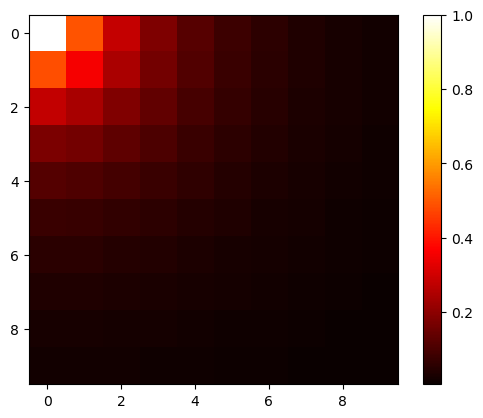

In [2]:
p_1 = 0.24
p_2 = 0.25
p_killed = 1 - 2*p_1 - 2*p_2

kappa = np.sqrt(p_killed/p_2)
alpha_1 = p_1/p_2
B_01 = LGF.eval_lgf(kappa, alpha_1, 0, 1, 10000)
B_10 = LGF.eval_lgf(kappa, alpha_1, 1, 0, 10000)
C_p1_p2 = 1/(1 + 2*p_1/p_2*B_10+2*B_01)

res = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        res[i,j] = LGF.eval_lgf(kappa, alpha_1, i, j, 10000)

res /= p_2
res *= C_p1_p2

plt.imshow(res[:10,:10], cmap='hot')
plt.colorbar()


In [3]:
def p_return(p_1, p_2):
    p_killed = 1 - 2*p_1 - 2*p_2

    kappa = np.sqrt(p_killed/p_2)
    alpha_1 = p_1/p_2
    B_01 = LGF.eval_lgf(kappa, alpha_1, 0, 1, 10000)
    B_10 = LGF.eval_lgf(kappa, alpha_1, 1, 0, 10000)
    C_p1_p2 = 1/(1 + 2*p_1/p_2*B_10+2*B_01)
    nx = 100
    ny = 100
    res = np.zeros((nx, ny))
    eps = 1e-12
    for i in range(ny):
        c = kappa
        eta_n = c**2/alpha_1 * (1 - 0.01)**2
        M_eta_n = 1/2/np.sqrt(c**2/alpha_1 - eta_n)
        gamma_eta_n = np.log(1 + eta_n/2 + np.sqrt((1 + eta_n/2)**2 - 1))

        N_trap = max(int(nx),int(math.ceil(0.5/gamma_eta_n*np.log(2*M_eta_n/eps)) + nx/2))
        
        tmp_res = LGF.eval_lgf_rfft(c, alpha_1, i, N_trap)
        res[:,i] = tmp_res[:nx]
        

    res /= p_2
    res *= C_p1_p2

    return res

[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01 ]


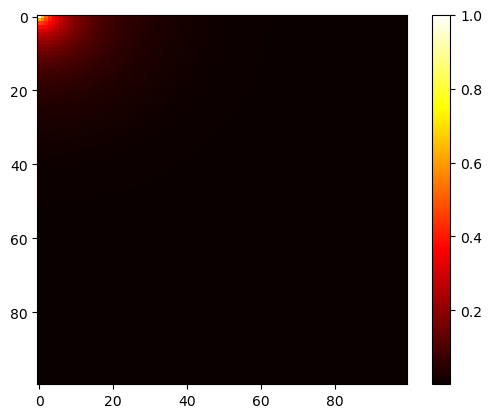

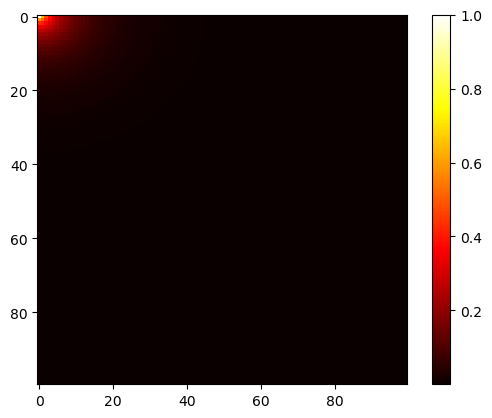

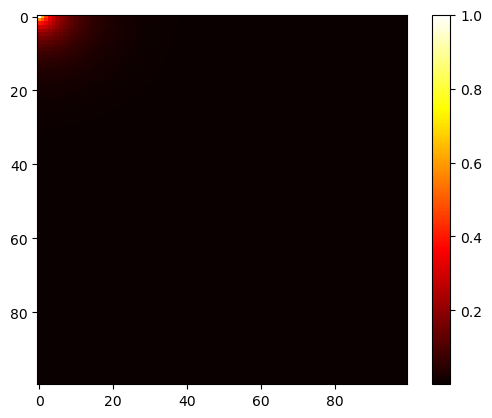

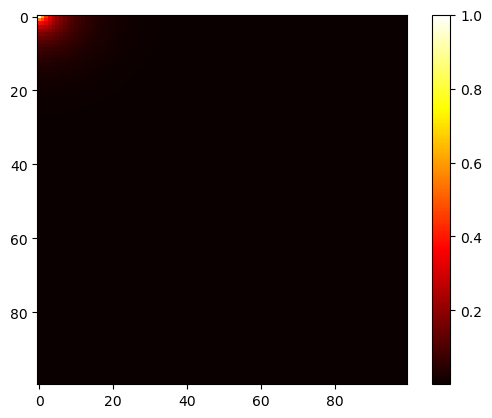

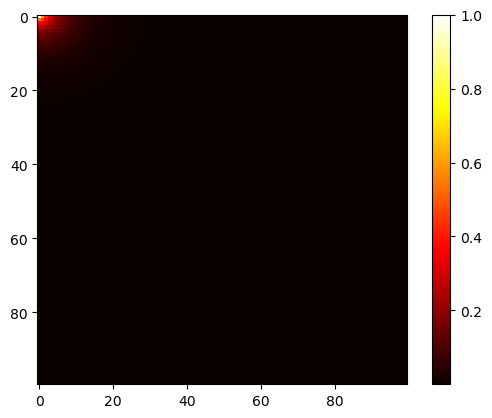

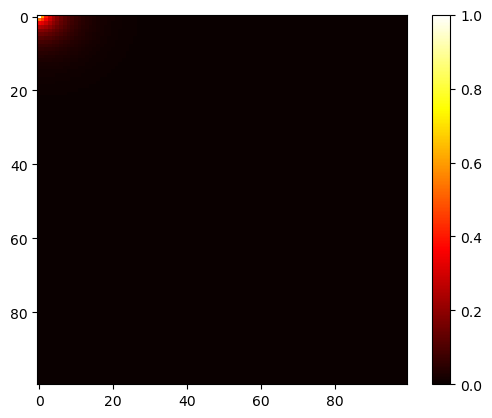

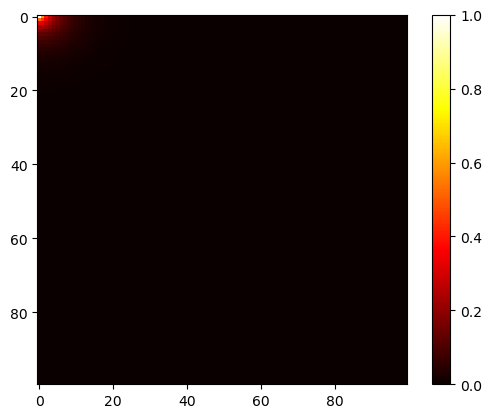

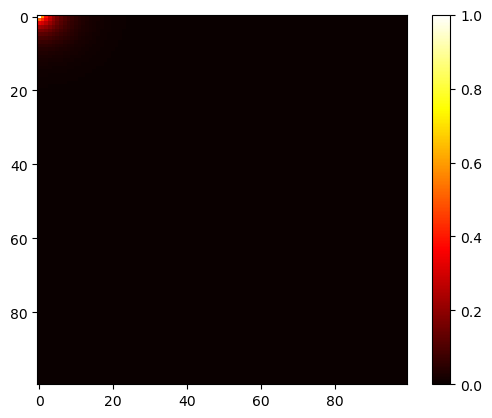

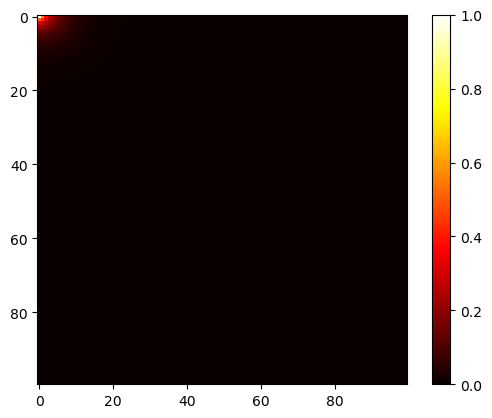

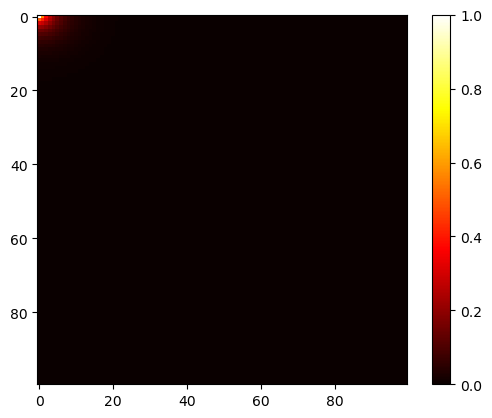

In [4]:
p_return_mat = np.zeros((10, 100, 100))
p_killed_vec = np.arange(0.001, 0.0101, 0.001)
print(p_killed_vec)

p1_unkilled = 0.2
p2_unkilled = 0.3
for i in range(10):
    p_tot = 1 - p_killed_vec[i]
    p_1 = p1_unkilled * p_tot
    p_2 = p2_unkilled * p_tot
    p_return_mat[i] = p_return(p_1, p_2)

for i in range(10):
    plt.imshow(p_return_mat[i], cmap='hot')
    plt.colorbar()
    plt.show()

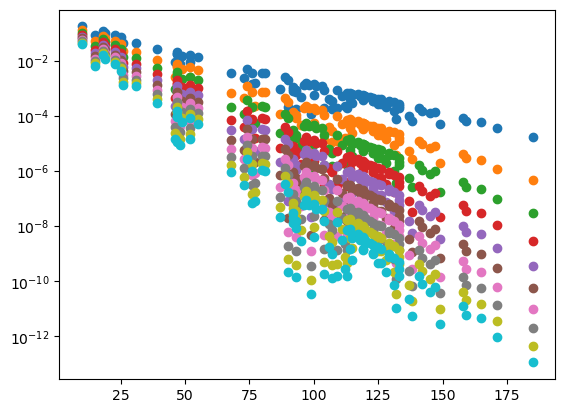

In [5]:
rd_choose = np.random.choice(10000, 100)
idx1 = rd_choose//100
idx2 = rd_choose % 100
for i in range(10):
    plt.semilogy(idx1+idx2, p_return_mat[i, idx1, idx2], 'o')

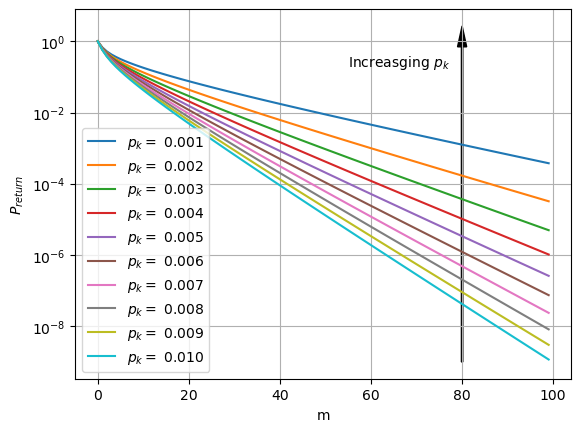

In [6]:
for i in range(10):
    v_str = r'$p_k=$ {p:.3f}'.format(p = p_killed_vec[i])
    plt.semilogy(p_return_mat[i, 0,:], label = v_str)

plt.legend()
plt.arrow(80, 1e-9, 0, 0.7, head_width=2, head_length=2,width=0.3, fc='k', ec='k')
plt.annotate(r'Increasging $p_k$', xy=(40, 1e-8), xytext=(55, 0.2),)
plt.grid('major')
plt.xlabel('m')
plt.ylabel(r'$P_{return}$')
plt.savefig('Random_walk_pics/p_return_n_0.pdf')

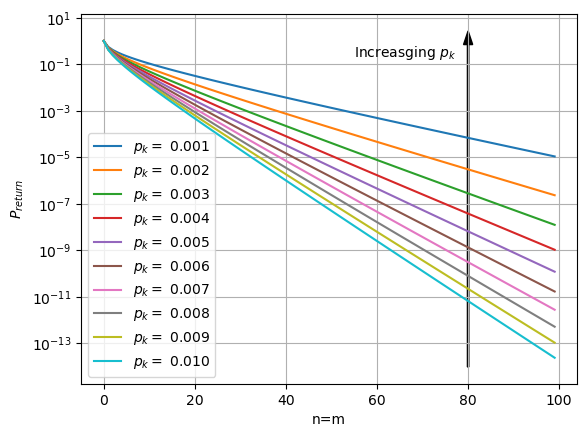

In [7]:

for i in range(10):
    v_str = r'$p_k=$ {p:.3f}'.format(p = p_killed_vec[i])
    plt.semilogy(np.diag(p_return_mat[i, :,:]), label=v_str)


plt.legend()
plt.grid('major')
plt.arrow(80, 1e-14, 0, 0.7, head_width=2, head_length=2,width=0.3, fc='k', ec='k')
plt.annotate(r'Increasging $p_k$', xy=(40, 1e-13), xytext=(55, 0.2),)
plt.xlabel('n=m')
plt.ylabel(r'$P_{return}$')
plt.savefig('Random_walk_pics/p_return_diag.pdf')

[1.00000000e-05 3.16227766e-05 1.00000000e-04 3.16227766e-04
 1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01]


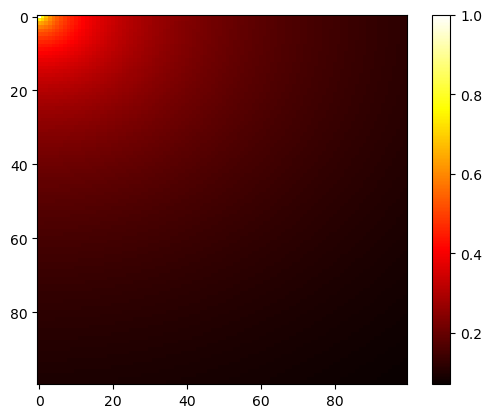

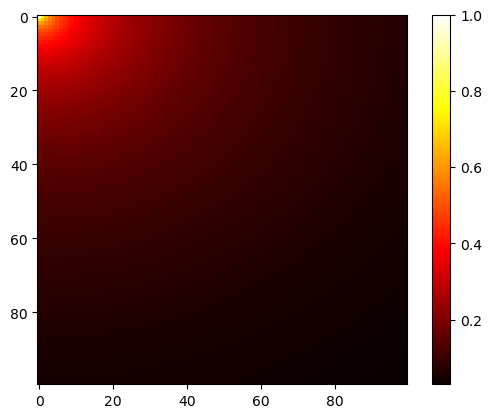

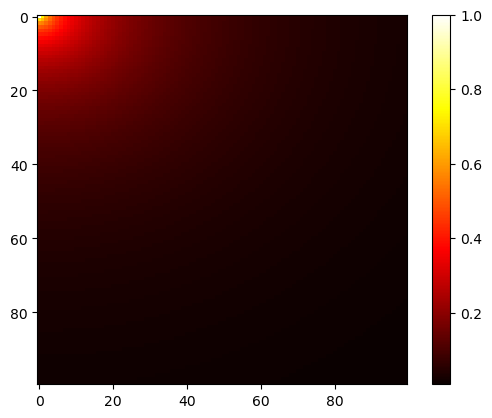

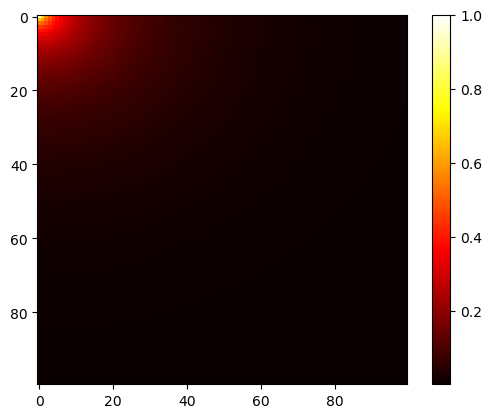

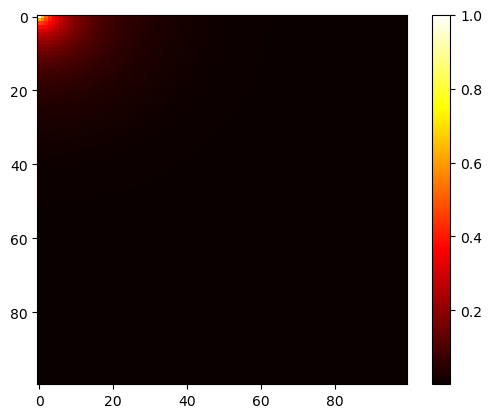

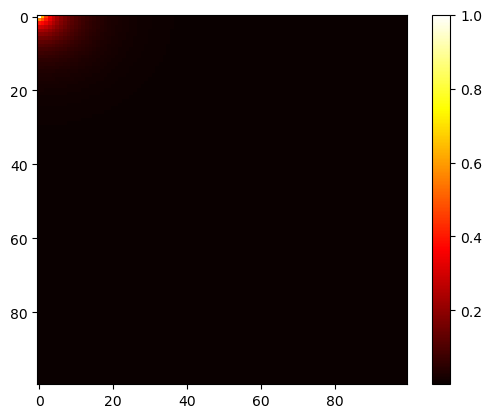

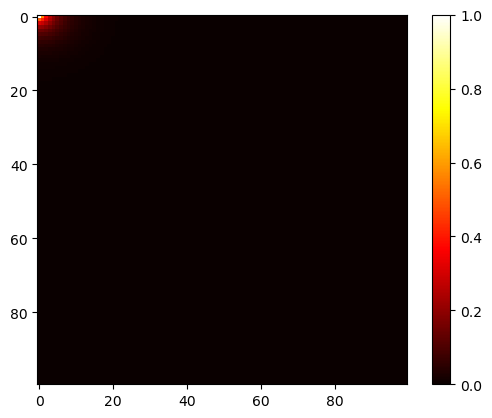

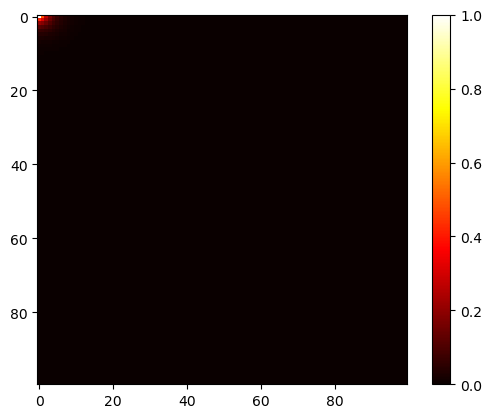

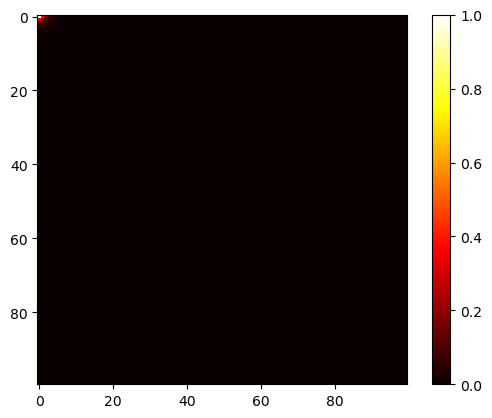

In [8]:

p_killed_vec = np.logspace(-5, -1,9)
p_return_mat = np.zeros((len(p_killed_vec), 100, 100))
print(p_killed_vec)

p1_unkilled = 0.2
p2_unkilled = 0.3
for i in range(len(p_killed_vec)):
    p_tot = 1 - p_killed_vec[i]
    p_1 = p1_unkilled * p_tot
    p_2 = p2_unkilled * p_tot
    p_return_mat[i] = p_return(p_1, p_2)

for i in range(len(p_killed_vec)):
    plt.imshow(p_return_mat[i], cmap='hot')
    plt.colorbar()
    plt.show()

In [9]:
p_killed_vec

array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01])

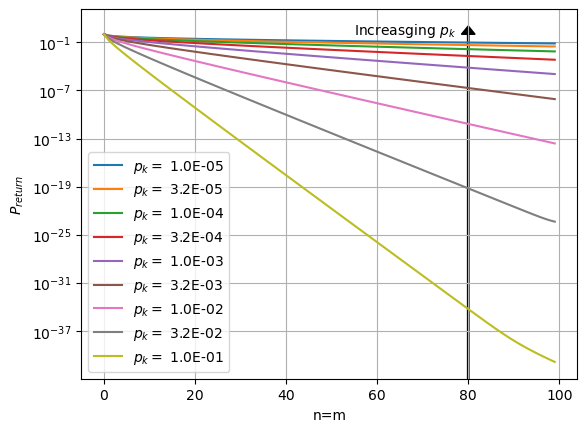

In [10]:
plt.clf()
for i in range(len(p_killed_vec)):
    v_str = r'$p_k=$ {p:.1E}'.format(p = p_killed_vec[i])
    plt.semilogy(np.diag(p_return_mat[i, :,:]), label=v_str)


plt.legend()
plt.grid('major')
plt.arrow(80, 1e-20, 0, 1.0, head_width=3, head_length=10, width=0.3, fc='k', ec='k')
plt.annotate(r'Increasging $p_k$', xy=(40, 1e-13), xytext=(55, 1),)
plt.xlabel('n=m')
plt.ylabel(r'$P_{return}$')
plt.savefig('Random_walk_pics/p_return_log_diag.pdf')

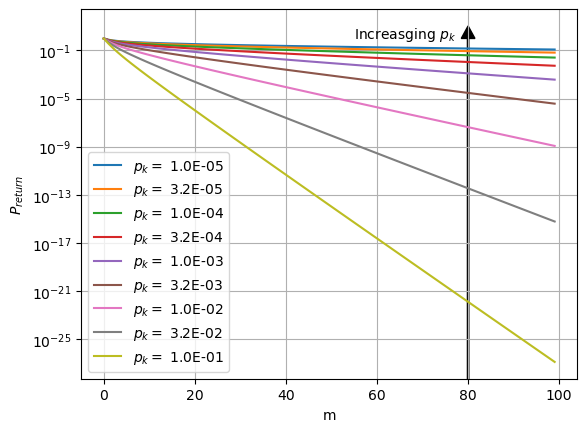

In [11]:
for i in range(len(p_killed_vec)):
    v_str = r'$p_k=$ {p:.1E}'.format(p = p_killed_vec[i])
    plt.semilogy(p_return_mat[i, 0,:], label = v_str)

plt.legend()
plt.arrow(80, 1e-20, 0, 1.0, head_width=3, head_length=10, width=0.3, fc='k', ec='k')
plt.annotate(r'Increasging $p_k$', xy=(40, 1e-13), xytext=(55, 1),)
plt.grid('major')
plt.xlabel('m')
plt.ylabel(r'$P_{return}$')
plt.savefig('Random_walk_pics/p_return_log_n_0.pdf')